In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [2]:
 crime=pd.read_csv("NumByzip.csv")

In [3]:
crime.head()

,zip,num
0,10001,116
1,10002,87
2,10003,124
3,10004,4
4,10005,7


In [7]:
population=pd.read_csv("population_density.csv")

In [8]:
population.head()

,﻿zipcode,density,population
0,10001,35350,21102
1,10002,93461,81410
2,10003,99419,56024
3,10004,5015,3089
4,10005,92791,7135


In [11]:
population.columns.values

array(['\ufeffzipcode', 'density', 'population'], dtype=object)

In [12]:
crime.columns.values

array(['zip', 'num'], dtype=object)

In [13]:
crime_pop=pd.merge(population,crime,left_on='\ufeffzipcode',right_on='zip')

In [17]:
crime_pop.head()

,﻿zipcode,density,population,zip,num
0,10001,35350,21102,10001,116
1,10002,93461,81410,10002,87
2,10003,99419,56024,10003,124
3,10004,5015,3089,10004,4
4,10005,92791,7135,10005,7


In [25]:
crime_pop['num/perpson']=crime_pop['num']/crime_pop['population']

In [26]:
crime_pop.head()

,﻿zipcode,density,population,zip,num,num/perpson
0,10001,35350,21102,10001,116,0.005497
1,10002,93461,81410,10002,87,0.001069
2,10003,99419,56024,10003,124,0.002213
3,10004,5015,3089,10004,4,0.001295
4,10005,92791,7135,10005,7,0.000981


In [27]:
crime_pop.to_csv('crimePerPerson.csv',encoding='utf-8',index=False)

In [4]:
income=pd.read_csv("income_byZip.csv")

In [5]:
income.head()

,﻿zipcode,Median Household income,Per-capital Income
0,11359,"68,684",0
1,10454,26048,11583
2,10474,"27,424",11884
3,10455,"26,186",12279
4,10453,0,12377


In [28]:
income.columns.values

array(['\ufeffzipcode', 'Median Household income', 'Per-capital Income'], dtype=object)

In [87]:
crime_pop_income=pd.merge(crime_pop,income,left_on='zip',right_on='\ufeffzipcode')


In [49]:
crime_pop_income.head()

,﻿zipcode_x,density,population,zip,num,num/perpson,﻿zipcode_y,Median Household income,Per-capital Income
0,10001,35350,21102,10001,116,0.005497,10001,"51,568","80,990"
1,10002,93461,81410,10002,87,0.001069,10002,"57,207","27,867"
2,10003,99419,56024,10003,124,0.002213,10003,"57,565","80,936"
3,10004,5015,3089,10004,4,0.001295,10004,"55,331","90,205"
4,10005,92791,7135,10005,7,0.000981,10005,"56,120","96,940"


In [88]:
crime_pop_income['Per-capital Income']=crime_pop_income['Per-capital Income'].str.replace(",", "")
crime_pop_income['Per-capital Income']=crime_pop_income['Per-capital Income'].astype(int)

In [89]:
#cols_to_norm = ['Per-capital Income','num/perpson','num']
#crime_pop_income[cols_to_norm] = crime_pop_income[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
#crime_pop_income_norm = (crime_pop_income - crime_pop_income.mean()) / (crime_pop_income.max() - crime_pop_income.min())

In [90]:
crime_pop_income.head()

,﻿zipcode_x,density,population,zip,num,num/perpson,﻿zipcode_y,Median Household income,Per-capital Income
0,10001,35350,21102,10001,116,0.005497,10001,"51,568",80990
1,10002,93461,81410,10002,87,0.001069,10002,"57,207",27867
2,10003,99419,56024,10003,124,0.002213,10003,"57,565",80936
3,10004,5015,3089,10004,4,0.001295,10004,"55,331",90205
4,10005,92791,7135,10005,7,0.000981,10005,"56,120",96940


In [86]:
#crime_pop_income.to_csv('Normal_crimePerPerson.csv',encoding='utf-8',index=False)

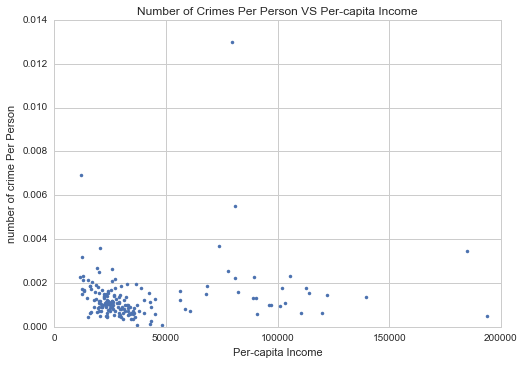

In [98]:


crime_pop_income['num']=crime_pop_income['num'].astype(int)
plt.plot(crime_pop_income['Per-capital Income'],crime_pop_income['num/perpson'], '.')
plt.title("Number of Crimes Per Person VS Per-capita Income")
plt.ylabel("number of crime Per Person")
plt.xlabel("Per-capita Income")
plt.savefig("crimesRateVSincome.jpeg")
plt.show()

In [95]:

crime_pop_income['num/perpson'].corr(crime_pop_income['Per-capital Income'])

0.13074270762249324

By looking at the scatter plot above, we can see there are some outliers in number of crimes per person. Let us remove those outliers and replot.

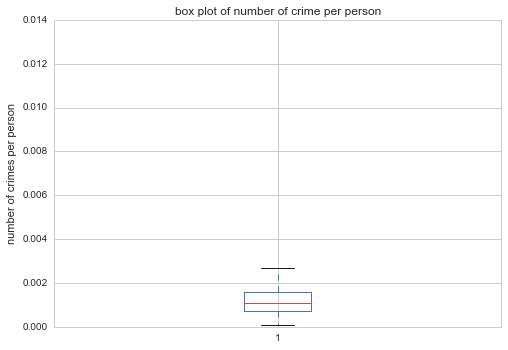

In [69]:
plt.boxplot(crime_pop_income['num/perpson'])
plt.title("box plot of number of crime per person")
plt.ylabel("number of crimes per person")
plt.savefig("crimePerPersonboxPlot.jpeg")

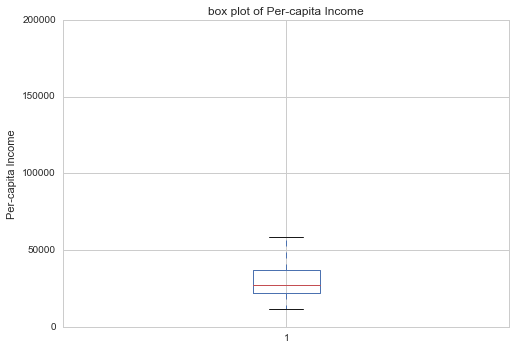

In [70]:
plt.boxplot(crime_pop_income['Per-capital Income'])
plt.title("box plot of Per-capita Income")
plt.ylabel("Per-capita Income")
plt.savefig("Per-capita_IncomeboxPlot.jpeg")

In [71]:
crime_pop_income_no_outlier=crime_pop_income[crime_pop_income['num/perpson']<0.004]
crime_pop_income_no_outlier=crime_pop_income_no_outlier[crime_pop_income_no_outlier['Per-capital Income']<=60000]

In [72]:
crime_pop_income_no_outlier['num/perpson'].corr(crime_pop_income_no_outlier['Per-capital Income'])

-0.38184994651356757

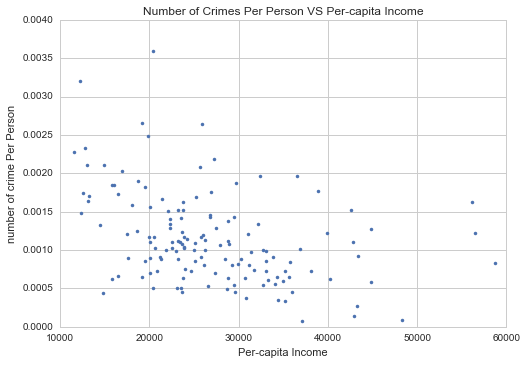

In [97]:

plt.plot(crime_pop_income_no_outlier['Per-capital Income'],crime_pop_income_no_outlier['num/perpson'],  '.')
plt.title("Number of Crimes Per Person VS Per-capita Income")
plt.ylabel("number of crime Per Person")
plt.xlabel("Per-capita Income")
plt.savefig("crimesRateVSincome_no_outlier.jpeg")
plt.show()

In [99]:
data=pd.read_csv("robbery_frauds_new.csv")
data.head()

,﻿,total,robbery,frauds
0,sat,-0.434326,-0.348659,-0.047084
1,single,0.492357,0.413971,-0.011195
2,teen,0.339510,0.400590,0.364411
